In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/train.csv")
df.dropna(inplace=True)

In [3]:
df.shape

(404287, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(50000,random_state=2)

In [6]:
new_df.isnull().sum()
# new_df.dropna(inplace=True)

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 331535 to 140517
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


## Data visualization

0    31404
1    18596
Name: is_duplicate, dtype: int64
0    62.808
1    37.192
Name: is_duplicate, dtype: float64


<AxesSubplot:>

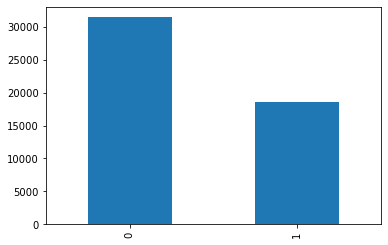

In [8]:
    # Distribution of dublicate and non-dublicate QueationL
print(new_df["is_duplicate"].value_counts())
print((new_df["is_duplicate"].value_counts()/new_df["is_duplicate"].count())*100)

    #visualization:
new_df["is_duplicate"].value_counts().plot(kind="bar")

Number of unique Queation : 89035
Number of queation getting repeated: 7309


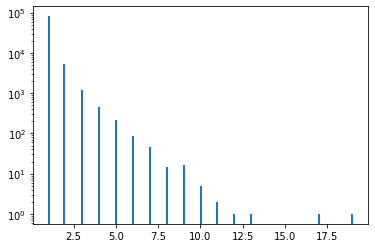

In [9]:
    # Repeated Queation:
qid = pd.Series(new_df["qid1"].tolist() + new_df["qid2"].tolist())
print("Number of unique Queation :",np.unique(qid).shape[0])

x = qid.value_counts()>1
print("Number of queation getting repeated:",x[x].shape[0])

    # Repeated queation visualization
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

##  Feature Engineering

In [10]:
    #add a new columns they work give question in total lengh:
new_df["q1_len"] = new_df["question1"].str.len()
new_df["q2_len"] = new_df["question2"].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64


In [11]:
    # how many word in question 1,2 in number of words.
new_df["q1_num_words"] = new_df["question1"].apply(lambda row : len(row.split(" ")))
new_df["q2_num_words"] = new_df["question2"].apply(lambda row : len(row.split(" ")))
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12


In [12]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row["question2"].split(" ")))
    return len(w1 & w2)

In [13]:
new_df["word_common"] = new_df.apply(common_words,axis=1)
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8


In [14]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row["question2"].split(" ")))
    return len(w1) + len(w2)

In [15]:
new_df["word_total"] = new_df.apply(total_words,axis=1)
new_df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23


In [16]:
new_df["word_share"] = round(new_df["word_common"]/new_df["word_total"],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


## Analysis of new features:


minimun characters q1_len: 1
meximun characters q1_len: 350
avrege charecters q1_len : 59.67338
------------------------------------------------------------
minimun characters q2_len: 7
meximun characters q2_len : 1169
avrege charecters q2_len: 60.17164


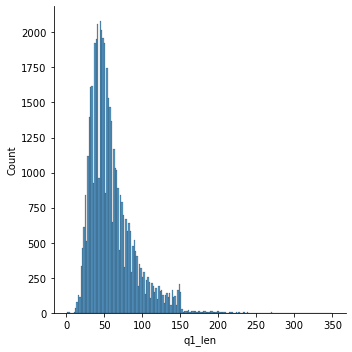

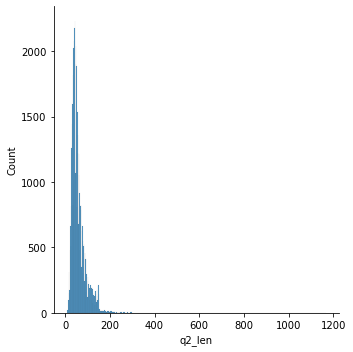

In [17]:
sns.displot(new_df["q1_len"])
print("minimun characters q1_len:",new_df["q1_len"].min())
print("meximun characters q1_len:", new_df["q1_len"].max())
print("avrege charecters q1_len :", new_df["q1_len"].mean())
print("------------------------------------------------------------")
sns.displot(new_df["q2_len"])
print("minimun characters q2_len:",new_df["q2_len"].min())
print("meximun characters q2_len :", new_df["q2_len"].max())
print("avrege charecters q2_len:", new_df["q2_len"].mean())

minimun  q1_num_words : 1
meximun  q1_num_words : 64
avrege q1_num_words : 10.96526
------------------------------------------------------------
minimun  q2_num_words : 2
meximun  q2_num_words : 237
avrege q2_num_words : 11.20328


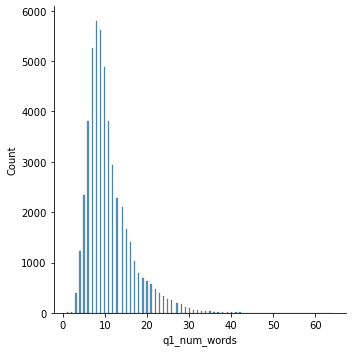

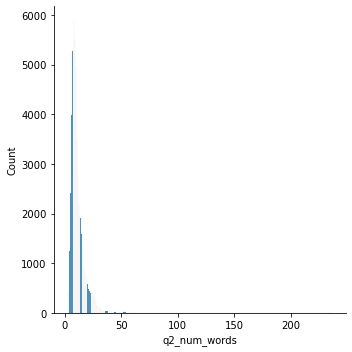

In [18]:
sns.displot(new_df["q1_num_words"])
print("minimun  q1_num_words :",new_df["q1_num_words"].min())
print("meximun  q1_num_words :", new_df["q1_num_words"].max())
print("avrege q1_num_words :", new_df["q1_num_words"].mean())


print("------------------------------------------------------------")
sns.displot(new_df["q2_num_words"])
print("minimun  q2_num_words :",new_df["q2_num_words"].min())
print("meximun  q2_num_words :", new_df["q2_num_words"].max())
print("avrege q2_num_words :", new_df["q2_num_words"].mean())

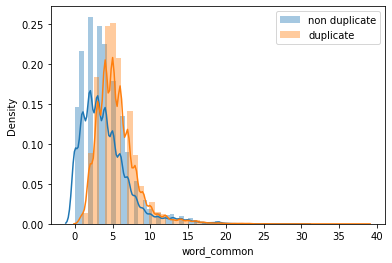

In [19]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

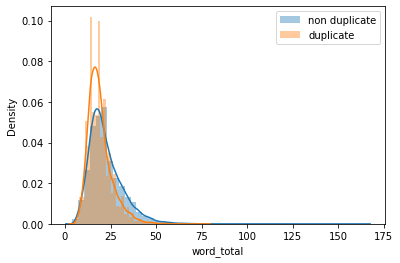

In [20]:
    #total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

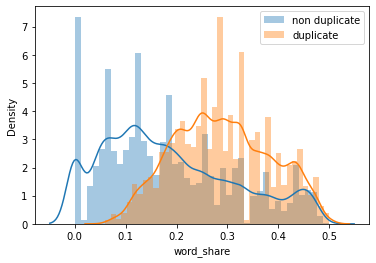

In [21]:
    #word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [22]:
ques_df = new_df[["question1","question2"]]
print(ques_df.shape)
ques_df.head(5)

(50000, 2)


,question1,question2
331535,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
286200,What is substitution?,What is a substitute for caciocavallo?
157195,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...
154346,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...


In [23]:
final_df = new_df.drop(columns=["id","qid1","qid2","question1","question2"])
print(final_df.shape)
final_df.head(5)

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,1,26,44,5,8,2,13,0.15
45407,1,34,44,5,7,4,12,0.33
286200,0,21,38,3,6,2,9,0.22
157195,1,45,73,10,16,5,25,0.20
154346,1,59,64,11,12,8,23,0.35


## Text Preprosscecing

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

question = list(ques_df["question1"]) + list(ques_df["question2"])

cv=CountVectorizer(max_features=3000)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [25]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

temp_df.shape

(50000, 6000)

In [26]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head(5)

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,26,44,5,8,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,10,16,5,25,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,8,23,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitng Dataset:

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,
                                                 random_state=1)

In [28]:
print("X_train Review Shape:",X_train.shape)
print("X_test Review Shape:",X_test.shape)
print("y_train Review label Shape",y_train.shape)
print("y_test Review label Shape",y_test.shape)

X_train Review Shape: (40000, 6007)
X_test Review Shape: (10000, 6007)
y_train Review label Shape (40000,)
y_test Review label Shape (10000,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7813

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=45,max_depth=5,learning_rate=0.5)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7597

####  clou : increased a accuracy fro some fecture engeenring  random forest 76 to almost 79 it good.
